# Heart Disease Prediction 

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2018/08/health.jpg)

###### Importing all required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

import plotly.express as px
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

Importing the dataset

In [2]:
heart_df = pd.read_csv('heart_disease_data.csv')

In [3]:
heart_df.shape

(303, 14)

In [4]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
heart_df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [6]:
heart_df['target'].value_counts().sort_values() 

0    138
1    165
Name: target, dtype: int64

In [7]:
heart_df['sex'].value_counts().sort_values() 

0     96
1    207
Name: sex, dtype: int64

In [8]:
heart_df['cp'].value_counts().sort_values() 

3     23
1     50
2     87
0    143
Name: cp, dtype: int64

In [9]:
heart_df['trestbps'].value_counts().sort_values() 

164     1
200     1
114     1
154     1
192     1
174     1
165     1
123     1
117     1
101     1
156     1
106     1
155     1
129     1
104     1
172     1
146     2
144     2
94      2
178     2
148     2
102     2
136     3
142     3
180     3
126     3
105     3
115     3
100     4
170     4
122     4
145     5
134     5
152     5
108     6
135     6
124     6
118     7
132     8
112     9
125    11
160    11
128    12
138    13
150    17
110    19
140    32
130    36
120    37
Name: trestbps, dtype: int64

In [10]:
heart_df['chol'].value_counts().sort_values() 

131    1
394    1
305    1
217    1
174    1
      ..
254    5
269    5
234    6
197    6
204    6
Name: chol, Length: 152, dtype: int64

In [11]:
heart_df['fbs'].value_counts().sort_values() 

1     45
0    258
Name: fbs, dtype: int64

In [12]:
heart_df['restecg'].value_counts().sort_values() 

2      4
0    147
1    152
Name: restecg, dtype: int64

In [13]:
heart_df['thalach'].value_counts().sort_values() 

90      1
88      1
97      1
127     1
137     1
       ..
173     8
152     8
163     9
160     9
162    11
Name: thalach, Length: 91, dtype: int64

In [14]:
heart_df['exang'].value_counts().sort_values() 

1     99
0    204
Name: exang, dtype: int64

In [15]:
heart_df['oldpeak'].value_counts().sort_values() 

4.4     1
3.1     1
0.7     1
3.5     1
6.2     1
3.8     1
5.6     1
2.9     1
2.1     1
1.3     1
4.2     2
2.5     2
3.2     2
2.3     2
1.1     2
2.4     3
0.3     3
4.0     3
3.4     3
0.9     3
2.2     4
3.6     4
0.5     5
1.9     5
3.0     5
1.5     5
2.6     6
2.8     6
0.1     7
2.0     9
0.4     9
1.8    10
1.6    11
0.2    12
0.8    13
1.4    13
0.6    14
1.0    14
1.2    17
0.0    99
Name: oldpeak, dtype: int64

In [16]:
heart_df['slope'].value_counts().sort_values() 

0     21
1    140
2    142
Name: slope, dtype: int64

In [17]:
heart_df['ca'].value_counts().sort_values() 

4      5
3     20
2     38
1     65
0    175
Name: ca, dtype: int64

In [18]:
heart_df['thal'].value_counts().sort_values() 

0      2
1     18
3    117
2    166
Name: thal, dtype: int64

In [19]:
heart_df['age'].value_counts().sort_values() 

77     1
29     1
76     1
74     1
37     2
34     2
69     3
40     3
71     3
38     3
70     4
39     4
35     4
68     4
47     5
49     5
46     7
50     7
66     7
48     7
53     8
42     8
55     8
45     8
43     8
65     8
61     8
67     9
63     9
41    10
64    10
62    11
56    11
44    11
60    11
51    12
52    13
59    14
54    16
57    17
58    19
Name: age, dtype: int64

In [20]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [21]:
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

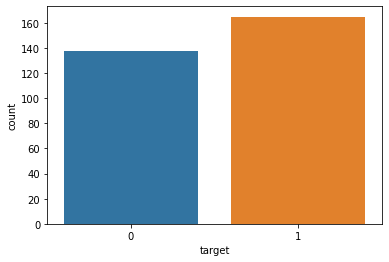

In [22]:
sb.countplot(x='target',data = heart_df);

<AxesSubplot:xlabel='target', ylabel='chol'>

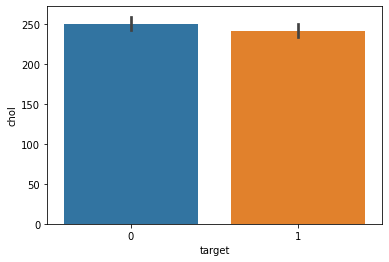

In [23]:
sb.barplot(x = 'target', y = 'chol', data = heart_df)

In [24]:
correlation = heart_df.corr()
correlation

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


Plotting the correlation in a heat map

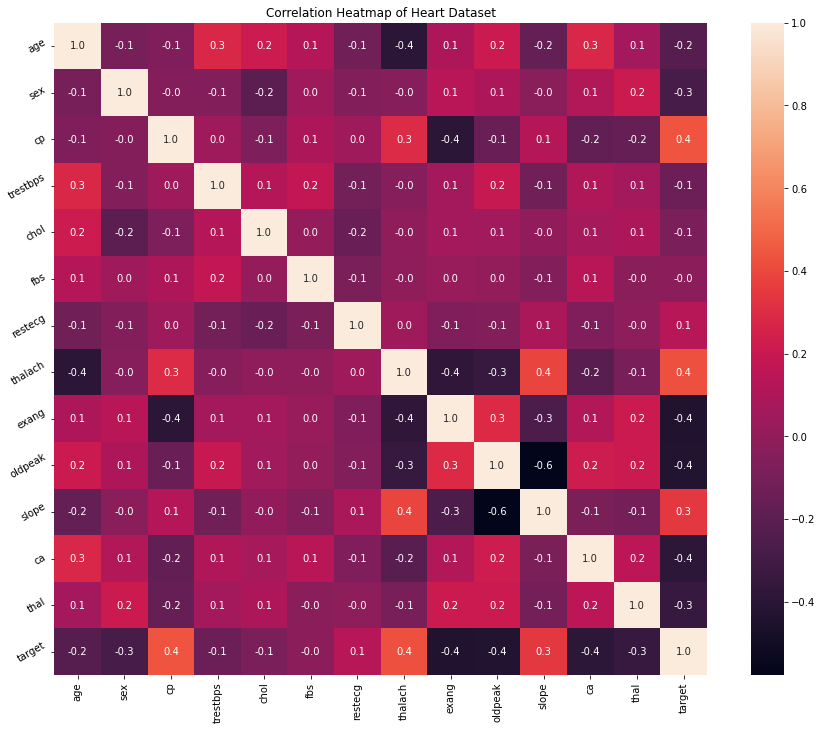

In [25]:
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Heart Dataset')
s = sb.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot = True)
s.set_xticklabels(s.get_xticklabels(), rotation=90)
s.set_yticklabels(s.get_yticklabels(), rotation=30)  
plt.show()

#### Spllitting the columns into feature and target columns

In [26]:
X = heart_df.drop('target', axis = 1)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [27]:
Y = heart_df['target']
Y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

#### Splitting the dataset into train and test dataset

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 2)  #20% of original data will be test data, random state ->
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(242, 13)
(61, 13)
(242,)
(61,)


## Model - 1  Decesion Tree

In [29]:
# Training the model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [30]:
X_train_prediction = model.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction, y_train)
print('Accuracy of the model with training data : ', train_data_accuracy)

Accuracy of the model with training data :  1.0


In [31]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)
print('Accuracy of the model with test data : ', test_data_accuracy)

Accuracy of the model with test data :  0.7704918032786885


In [32]:
a_np = np.asarray((41, 0, 1, 105, 198, 0, 1, 168, 0, 0, 2, 1, 2))
a_np_reshape = a_np.reshape(1, -1)

prediction = model.predict(a_np_reshape)

if (prediction [0] == 1):
    print('Heart is defective')
else:
    print('Heart is healthy')

Heart is defective
